In [274]:
import math
import sympy as sp
import sympy  as sp
from sympy.matrices import Matrix
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from math import pi
import pprint
pp=pprint.PrettyPrinter(indent=5)

x,y,z,r,o=sp.symbols("x y z r theta")
#Tool Velocity Matrix


X_BR=sp.Matrix([[50*sp.sin((2*np.pi*o)/50)*(2*np.pi/5)],[0],[50*sp.cos((2*np.pi*o)/50)*(2*np.pi/5)],[0],[0],[0]])
X1_BR=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
X_FR=sp.Matrix([[50*sp.sin((2*np.pi*o)/50)*(2*np.pi)/5],[0],[50*sp.cos((2*np.pi*o)/50)*(2*np.pi)/5],[0],[0],[0]])
X1_FR=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
X_BL=sp.Matrix([[200*sp.sin((2*np.pi*o)/50)*(2*np.pi)/5],[0],[200*sp.cos((2*np.pi*o)/50)*(2*np.pi)/5],[0],[0],[0]])
X1_BL=sp.Matrix([[-160],[0],[0],[0],[0],[0]])
X_FL=sp.Matrix([[200*sp.sin((2*np.pi*o)/50)*(2*np.pi)/5],[0],[200*sp.cos((2*np.pi*o)/50)*(2*np.pi)/5],[0],[0],[0]])
X1_FL=sp.Matrix([[-160],[0],[0],[0],[0],[0]])


file_name='front_jump_gait.json'

theta_i, alpha_i, d_i, a_i, A_i, a_3, d_1, d_3, d_5, d_7 = sp.symbols('theta_i alpha_i d_i a_i A_i a_3 d_1, d_3, d_5, d_7')
theta_1,theta_2,theta_3,theta_4,theta_5,theta_6,theta_7 = sp.symbols ('theta_1,theta_2, theta_3, theta_4, theta_5, theta_6, theta_7')
Rot_z = sp.Matrix([ [sp.cos(theta_i), -sp.sin(theta_i),0,0], [sp.sin(theta_i),sp.cos(theta_i),0,0], [0,0,1,0], [0,0,0,1] ]);
Rot_x = sp.Matrix([ [1,0,0,0], [0,sp.cos(alpha_i), -sp.sin(alpha_i),0], [0, sp.sin(alpha_i), sp.cos(alpha_i), 0], [0,0,0,1] ]); 
Tran_z = sp.Matrix([[1,0,0,0], [0,1,0,0], [0,0,1,d_i], [0,0,0,1]])
Tran_x = sp.Matrix([[1,0,0,a_i], [0,1,0,0], [0,0,1,0], [0,0,0,1]])

A_i=Rot_z*Tran_z*Tran_x*Rot_x

# Back Left Leg

BL_Ad0=A_i.subs([(theta_i,math.radians(90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,0)])
BL_A1=A_i.subs([(theta_i,theta_1),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
BL_Ad1=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,64.85)])
BL_A2=A_i.subs([(theta_i,theta_2),(alpha_i,math.radians(0)),(a_i,0),(d_i,-140)])
BL_Ad2=A_i.subs([(theta_i,math.radians(0)),(alpha_i,math.radians(0)),(a_i,500),(d_i,0)])
BL_A3=A_i.subs([(theta_i,theta_3),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
BL_A4=A_i.subs([(theta_i,0),(alpha_i,math.radians(0)),(a_i,450),(d_i,0)])

# Back Right Leg
BR_Ad0=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,0)])
BR_A1=A_i.subs([(theta_i,theta_1),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
BR_Ad1=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(-90)),(a_i,0),(d_i,64.85)])
BR_A2=A_i.subs([(theta_i,theta_2),(alpha_i,math.radians(0)),(a_i,0),(d_i,140)])
BR_Ad2=A_i.subs([(theta_i,math.radians(0)),(alpha_i,math.radians(0)),(a_i,500),(d_i,0)])
BR_A3=A_i.subs([(theta_i,theta_3),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
BR_A4=A_i.subs([(theta_i,0),(alpha_i,math.radians(0)),(a_i,450),(d_i,0)])


#Front Left Leg
FL_Ad0=A_i.subs([(theta_i,math.radians(90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,0)])
FL_A1=A_i.subs([(theta_i,theta_1),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
FL_Ad1=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,64.85)])
FL_A2=A_i.subs([(theta_i,theta_2),(alpha_i,math.radians(0)),(a_i,0),(d_i,-140)])
FL_Ad2=A_i.subs([(theta_i,math.radians(0)),(alpha_i,math.radians(0)),(a_i,500),(d_i,0)])
FL_A3=A_i.subs([(theta_i,theta_3),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
FL_A4=A_i.subs([(theta_i,0),(alpha_i,math.radians(0)),(a_i,450),(d_i,0)])


#Front Right Leg
FR_Ad0=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(90)),(a_i,0),(d_i,0)])
FR_A1=A_i.subs([(theta_i,theta_1),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
FR_Ad1=A_i.subs([(theta_i,math.radians(-90)),(alpha_i,math.radians(-90)),(a_i,0),(d_i,-64.85)])
FR_A2=A_i.subs([(theta_i,theta_2),(alpha_i,math.radians(0)),(a_i,0),(d_i,140)])
FR_Ad2=A_i.subs([(theta_i,math.radians(0)),(alpha_i,math.radians(0)),(a_i,500),(d_i,0)])
FR_A3=A_i.subs([(theta_i,theta_3),(alpha_i,math.radians(0)),(a_i,0),(d_i,0)])
FR_A4=A_i.subs([(theta_i,0),(alpha_i,math.radians(0)),(a_i,450),(d_i,0)])


T1=BR_Ad0*BR_A1
T2=BR_Ad0*BR_A1*BR_Ad1*BR_A2
T3=BR_Ad0*BR_A1*BR_Ad1*BR_A2*BR_Ad2*BR_A3
T4=BR_Ad0*BR_A1*BR_Ad1*BR_A2*BR_Ad2*BR_A3*BR_A4

Z0 = T1[:3,2]
Z1 = T2[:3,2]
Z2 = T3[:3,2]
Z3 = T4[:3,2]
Xp=T4[:3,3]
diff_thet_1 = Xp.diff(theta_1) #Partially differentiating Xp wrt θ1
diff_thet_2 = Xp.diff(theta_2) #Partially differentiating Xp wrt θ2
diff_thet_3 = Xp.diff(theta_3) #Partially differentiating Xp wrt θ4
J_BR = Matrix([[diff_thet_1[0],diff_thet_2[0],diff_thet_3[0]],
          [diff_thet_1[1],diff_thet_2[1],diff_thet_3[1]],
          [diff_thet_1[2],diff_thet_2[2],diff_thet_3[2]],
          [Z0[0],Z1[0],Z2[0]],[Z0[1],Z1[1],Z2[1]],[Z0[2],Z1[2],Z2[2]]])

T1=BL_Ad0*BL_A1
T2=BL_Ad0*BL_A1*BL_Ad1*BL_A2
T3=BL_Ad0*BL_A1*BL_Ad1*BL_A2*BL_Ad2*BL_A3
T4=BL_Ad0*BL_A1*BL_Ad1*BL_A2*BL_Ad2*BL_A3*BL_A4

Z0 = T1[:3,2]
Z1 = T2[:3,2]
Z2 = T3[:3,2]
Z3 = T4[:3,2]
Xp=T4[:3,3]
diff_thet_1 = Xp.diff(theta_1) #Partially differentiating Xp wrt θ1
diff_thet_2 = Xp.diff(theta_2) #Partially differentiating Xp wrt θ2
diff_thet_3 = Xp.diff(theta_3) #Partially differentiating Xp wrt θ4
J_BL = Matrix([[diff_thet_1[0],diff_thet_2[0],diff_thet_3[0]],
          [diff_thet_1[1],diff_thet_2[1],diff_thet_3[1]],
          [diff_thet_1[2],diff_thet_2[2],diff_thet_3[2]],
          [Z0[0],Z1[0],Z2[0]],[Z0[1],Z1[1],Z2[1]],[Z0[2],Z1[2],Z2[2]]])

T1=FL_Ad0*FL_A1
T2=FL_Ad0*FL_A1*FL_Ad1*FL_A2
T3=FL_Ad0*FL_A1*FL_Ad1*FL_A2*FL_Ad2*FL_A3
T4=FL_Ad0*FL_A1*FL_Ad1*FL_A2*FL_Ad2*FL_A3*FL_A4

Z0 = T1[:3,2]
Z1 = T2[:3,2]
Z2 = T3[:3,2]
Z3 = T4[:3,2]
Xp=T4[:3,3]
diff_thet_1 = Xp.diff(theta_1) #Partially differentiating Xp wrt θ1
diff_thet_2 = Xp.diff(theta_2) #Partially differentiating Xp wrt θ2
diff_thet_3 = Xp.diff(theta_3) #Partially differentiating Xp wrt θ4
J_FL = Matrix([[diff_thet_1[0],diff_thet_2[0],diff_thet_3[0]],
          [diff_thet_1[1],diff_thet_2[1],diff_thet_3[1]],
          [diff_thet_1[2],diff_thet_2[2],diff_thet_3[2]],
          [Z0[0],Z1[0],Z2[0]],[Z0[1],Z1[1],Z2[1]],[Z0[2],Z1[2],Z2[2]]])

T1=FR_Ad0*FR_A1
T2=FR_Ad0*FR_A1*FR_Ad1*FR_A2
T3=FR_Ad0*FR_A1*FR_Ad1*FR_A2*FR_Ad2*FR_A3
T4=FR_Ad0*FR_A1*FR_Ad1*FR_A2*FR_Ad2*FR_A3*FR_A4

Z0 = T1[:3,2]
Z1 = T2[:3,2]
Z2 = T3[:3,2]
Z3 = T4[:3,2]
Xp=T4[:3,3]
diff_thet_1 = Xp.diff(theta_1) #Partially differentiating Xp wrt θ1
diff_thet_2 = Xp.diff(theta_2) #Partially differentiating Xp wrt θ2
diff_thet_3 = Xp.diff(theta_3) #Partially differentiating Xp wrt θ4
J_FR = Matrix([[diff_thet_1[0],diff_thet_2[0],diff_thet_3[0]],
          [diff_thet_1[1],diff_thet_2[1],diff_thet_3[1]],
          [diff_thet_1[2],diff_thet_2[2],diff_thet_3[2]],
          [Z0[0],Z1[0],Z2[0]],[Z0[1],Z1[1],Z2[1]],[Z0[2],Z1[2],Z2[2]]])





In [275]:
dt=0.05  #Time difference
t_1=[math.radians(0)]  #Theta 1
t_2=[-0.7]  #Theta 2
t_3=[1.5]  #Theta 4
back_right_joint=[]
T=T4
x_tool_br=[]
y_tool_br=[]
z_tool_br=[]
#Tool Velocity Matrix
# X=sp.Matrix([[100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[0],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
# X1=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
i=0
j=0
print("Computing Trajectory")
while i<=50:
    if i<25:
        X_eval=X_BR.subs(o,i)
    if i>25:
        X_eval=X1_BR.subs(o,j)
        j+=1
    back_right_joint.append([t_1[i],t_2[i],t_3[i]])
    T_eval=T.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    x_tool_br.append(T_eval[3])
    y_tool_br.append(T_eval[7])
    z_tool_br.append(T_eval[11])
    J_eval=J_BR.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    q=J_eval.pinv()*X_eval
    q=q*dt
#     print(q)
    t_1.append(q[0]+t_1[i])
    t_2.append(q[1]+t_2[i])
    t_3.append(q[2]+t_3[i])
    
    print(".",end="")
    i=i+1

Computing Trajectory
...................................................

In [276]:
dt=0.05  #Time difference
t_1=[math.radians(0)]  #Theta 1
t_2=[-0.7]  #Theta 2
t_3=[1.5]  #Theta 4
front_right_joint=[]
T=T4
x_tool_fr=[]
y_tool_fr=[]
z_tool_fr=[]
#Tool Velocity Matrix
# X=sp.Matrix([[100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[0],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
# X1=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
i=0
j=0
print("Computing Trajectory")
while i<=50:
    if i<25:
        X_eval=X_FR.subs(o,i)
    if i>25:
        X_eval=X1_FR.subs(o,j)
        j+=1
    front_right_joint.append([t_1[i],t_2[i],t_3[i]])
    T_eval=T.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    x_tool_fr.append(T_eval[3])
    y_tool_fr.append(T_eval[7])
    z_tool_fr.append(T_eval[11])
    J_eval=J_FR.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    q=J_eval.pinv()*X_eval
    q=q*dt
#     print(q)
    t_1.append(q[0]+t_1[i])
    t_2.append(q[1]+t_2[i])
    t_3.append(q[2]+t_3[i])
    
    print(".",end="")
    i=i+1

Computing Trajectory
...................................................

In [277]:
dt=0.05  #Time difference
t_1=[math.radians(0)]  #Theta 1
t_2=[-0.7]  #Theta 2
t_3=[1.5]  #Theta 4
front_left_joint=[]
T=T4
x_tool_fl=[]
y_tool_fl=[]
z_tool_fl=[]
#Tool Velocity Matrix
# X=sp.Matrix([[100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[0],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
# X1=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
i=0
j=0
print("Computing Trajectory")
while i<=50:
    if i<25:
        X_eval=X_FL.subs(o,i)
    if i>25:
        X_eval=X1_FL.subs(o,j)
        j+=1
    front_left_joint.append([t_1[i],t_2[i],t_3[i]])
    T_eval=T.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    x_tool_fl.append(T_eval[3])
    y_tool_fl.append(T_eval[7])
    z_tool_fl.append(T_eval[11])
    J_eval=J_FL.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    q=J_eval.pinv()*X_eval
    q=q*dt
#     print(q)
    t_1.append(q[0]+t_1[i])
    t_2.append(q[1]+t_2[i])
    t_3.append(q[2]+t_3[i])
    
    print(".",end="")
    i=i+1

Computing Trajectory
...................................................

In [278]:
dt=0.05  #Time difference
t_1=[math.radians(0)]  #Theta 1
t_2=[-0.7]  #Theta 2
t_3=[1.5]  #Theta 4
back_left_joint=[]
T=T4
x_tool_bl=[]
y_tool_bl=[]
z_tool_bl=[]
#Tool Velocity Matrix
# X=sp.Matrix([[100*sp.sin((2*np.pi*o)/200)*(2*np.pi)/10],[0],[100*sp.cos((2*np.pi*o)/200)*(2*np.pi)/10],[0],[0],[0]])
# X1=sp.Matrix([[-40],[0],[0],[0],[0],[0]])
i=0
j=0
print("Computing Trajectory")
while i<=50:
    if i<25:
        X_eval=X_BL.subs(o,i)
    if i>25:
        X_eval=X1_BL.subs(o,j)
        j+=1
    back_left_joint.append([t_1[i],t_2[i],t_3[i]])
    T_eval=T.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    x_tool_bl.append(T_eval[3])
    y_tool_bl.append(T_eval[7])
    z_tool_bl.append(T_eval[11])
    J_eval=J_BL.subs([(theta_1,t_1[i]),(theta_2,t_2[i]),(theta_3,t_3[i])])
    q=J_eval.pinv()*X_eval
    q=q*dt
#     print(q)
    t_1.append(q[0]+t_1[i])
    t_2.append(q[1]+t_2[i])
    t_3.append(q[2]+t_3[i])
    
    print(".",end="")
    i=i+1

Computing Trajectory
...................................................

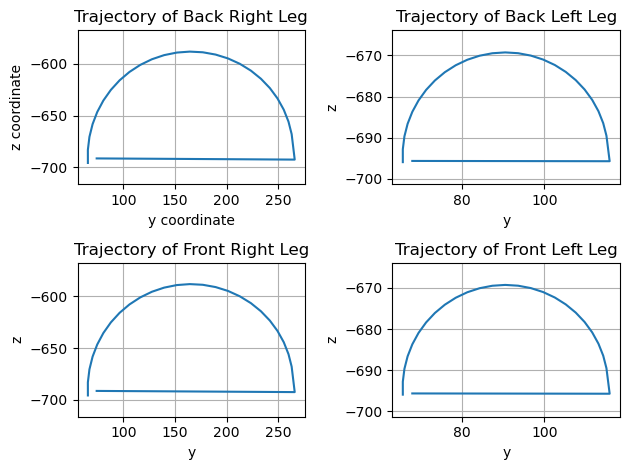

In [279]:
import matplotlib.pyplot as plt

# Create a grid of subplots with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2)

# Plot 1: Top left subplot
axs[0, 0].plot(x_tool_br, z_tool_br)
axs[0, 0].set_xlabel("y coordinate")
axs[0, 0].set_ylabel("z coordinate")
axs[0, 0].set_title("Trajectory of Back Right Leg")
axs[0, 0].axis("equal")
axs[0, 0].grid(True)

# Plot 2: Top right subplot
axs[0, 1].plot(x_tool_bl, z_tool_bl)  # Replace with your desired plot
axs[0, 1].set_xlabel("y")
axs[0, 1].set_ylabel("z")
axs[0, 1].set_title("Trajectory of Back Left Leg")
axs[0, 1].axis("equal")
axs[0, 1].grid(True)
# Add other formatting and plotting commands as needed

# Plot 3: Bottom left subplot
axs[1, 0].plot(x_tool_fr, z_tool_fr)  # Replace with your desired plot
axs[1, 0].set_xlabel("y")
axs[1, 0].set_ylabel("z")
axs[1, 0].set_title("Trajectory of Front Right Leg")
axs[1, 0].axis("equal")
axs[1, 0].grid(True)
# Add other formatting and plotting commands as needed

# Plot 4: Bottom right subplot
axs[1, 1].plot(x_tool_fl, z_tool_fl)  # Replace with your desired plot
axs[1, 1].set_xlabel("y")
axs[1, 1].set_ylabel("z")
axs[1, 1].set_title("Trajectory of Front Left Leg")
axs[1,1].axis("equal")
axs[1,1].grid(True)
# Add other formatting and plotting commands as needed

# Adjust the layout to avoid overlapping titles and labels
fig.tight_layout()

# Show the plot
plt.show()

In [280]:
front_left_joint

[[0.0, -0.7, 1.5],
 [2.63651055134617e-9, -0.704388528480752, 1.50974151642953],
 [5.54595238899135e-9, -0.708146707756130, 1.51935506106333],
 [8.69150859230879e-9, -0.711208520967584, 1.52869059442324],
 [1.20314079322546e-8, -0.713519659422715, 1.53760257187908],
 [1.55189675164345e-8, -0.715038781824335, 1.54595210501629],
 [1.91027986660379e-8, -0.715738523341944, 1.55360904062798],
 [2.27272206651196e-8, -0.715606210928997, 1.56045393567888],
 [2.63329191175269e-8, -0.714644247267841, 1.56637990273833],
 [2.98578720103168e-8, -0.712870135195922, 1.57129429646483],
 [3.32385474559520e-8, -0.710316127415059, 1.57512020862482],
 [3.64113534629741e-8, -0.707028502185693, 1.57779773766483],
 [3.93142940172049e-8, -0.703066483506428, 1.57928499967636],
 [4.18887601498136e-8, -0.698500842468713, 1.57955885106497],
 [4.40813629347279e-8, -0.693412233272225, 1.57861529937882],
 [4.58457009807533e-8, -0.687889330978978, 1.57646958720869],
 [4.71439506982302e-8, -0.682026846926349, 1.573155

In [281]:
front_right_joint

[[0.0, -0.7, 1.5],
 [1.05460422060659e-8, -0.717554113923009, 1.53896606571811],
 [2.23865449675224e-8, -0.732240559005743, 1.57683896769377],
 [3.55287115668138e-8, -0.743732041532171, 1.61308856224523],
 [4.99539318602798e-8, -0.751751187647936, 1.64719917017379],
 [6.56030541866675e-8, -0.756082550312249, 1.67867294791000],
 [8.23598352827614e-8, -0.756585275142209, 1.70703513562235],
 [1.00033877616932e-7, -0.753205324815745, 1.73184139215220],
 [1.18345378595111e-7, -0.745985734903770, 1.75268715788824],
 [1.36915091857019e-7, -0.735073092871163, 1.76921865490372],
 [1.55263642913360e-7, -0.720718439205139, 1.78114476687070],
 [1.72824198697502e-7, -0.703271206959772, 1.78824870104890],
 [1.88970956697403e-7, -0.683165677592480, 1.79039811006319],
 [2.03062871998514e-7, -0.660900624188706, 1.78755233499646],
 [2.14498050368063e-7, -0.637014069148432, 1.77976568206514],
 [2.22770573485229e-7, -0.612056047271142, 1.76718615007154],
 [2.27519698599879e-7, -0.586562632212963, 1.750049

In [282]:
back_left_joint

[[0.0, -0.7, 1.5],
 [2.63651055134617e-9, -0.704388528480752, 1.50974151642953],
 [5.54595238899135e-9, -0.708146707756130, 1.51935506106333],
 [8.69150859230879e-9, -0.711208520967584, 1.52869059442324],
 [1.20314079322546e-8, -0.713519659422715, 1.53760257187908],
 [1.55189675164345e-8, -0.715038781824335, 1.54595210501629],
 [1.91027986660379e-8, -0.715738523341944, 1.55360904062798],
 [2.27272206651196e-8, -0.715606210928997, 1.56045393567888],
 [2.63329191175269e-8, -0.714644247267841, 1.56637990273833],
 [2.98578720103168e-8, -0.712870135195922, 1.57129429646483],
 [3.32385474559520e-8, -0.710316127415059, 1.57512020862482],
 [3.64113534629741e-8, -0.707028502185693, 1.57779773766483],
 [3.93142940172049e-8, -0.703066483506428, 1.57928499967636],
 [4.18887601498136e-8, -0.698500842468713, 1.57955885106497],
 [4.40813629347279e-8, -0.693412233272225, 1.57861529937882],
 [4.58457009807533e-8, -0.687889330978978, 1.57646958720869],
 [4.71439506982302e-8, -0.682026846926349, 1.573155

In [283]:
back_right_joint

[[0.0, -0.7, 1.5],
 [1.05460422060659e-8, -0.717554113923009, 1.53896606571811],
 [2.23865449675224e-8, -0.732240559005743, 1.57683896769377],
 [3.55287115668137e-8, -0.743732041532171, 1.61308856224523],
 [4.99539318602798e-8, -0.751751187647936, 1.64719917017379],
 [6.56030541866674e-8, -0.756082550312249, 1.67867294791000],
 [8.23598352827614e-8, -0.756585275142209, 1.70703513562235],
 [1.00033877616932e-7, -0.753205324815745, 1.73184139215220],
 [1.18345378595111e-7, -0.745985734903770, 1.75268715788824],
 [1.36915091857019e-7, -0.735073092871163, 1.76921865490372],
 [1.55263642913360e-7, -0.720718439205139, 1.78114476687070],
 [1.72824198697501e-7, -0.703271206959772, 1.78824870104890],
 [1.88970956697403e-7, -0.683165677592480, 1.79039811006319],
 [2.03062871998514e-7, -0.660900624188706, 1.78755233499646],
 [2.14498050368403e-7, -0.637014069148432, 1.77976568206514],
 [2.22770573485569e-7, -0.612056047271142, 1.76718615007154],
 [2.27519698600219e-7, -0.586562632212963, 1.750049